Sources:
    
http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

http://scikit-learn.org/stable/modules/tree.html

https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

http://scikit-learn.org/stable/modules/neighbors.html

http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

# k Nearest Neighbors

Today we will try to predict a student's GPA using Decision Trees and K Nearest Neighbors Algorithms. 

Tutorial plan:

[1. Data Preprocessing](#1.-Data-Preprocessing)

[2. K Nearest Neighbors (Regression)](#3.-K-Nearest-Neighbors)


* We will use three input variables for decision trees. These input variables (or **predictors**) do not need to be discrete.

**K Nearest Neighbors**

Additional topics:
* feature normalization

### Let's start by loading in our data, looking at it and reshaping it to the form that's necessary for our algorithm.

In [1]:
# import libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys, os
from sklearn.metrics import accuracy_score
import sys
# ff is a library written by the Fragile Families team and stored in a file ff.py a level up from our directory. 
# To import it, we need to append the directory above ours ('..') to our path and import the ff package (file ff.py)
sys.path.append('..')
import ff

### Set input variables

In [2]:
# directory with output data
background = "../../ai4all_data/background.csv"
train = "../../ai4all_data/train.csv"
output_dir = "../output"

# if the output directory hasn't been created, Python will complain, so let's create it if it doesn't exist yet.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# k Nearest Neighbors

http://scikit-learn.org/stable/modules/neighbors.html

We will use K Nearest Neighbors for classification (assigning input to one of predefined classes). 

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point. 

However, it is a method that can also be used for regression (predicting a continuous output) and clustering (unsupervised grouping of inputs).

The basic idea behind K Nearest Neighbors Classification is that you assign each data point to a class based on the K (could be 1, 2, 5 etc.) points most similar to it (K Nearest Neighbors).

Let's try to predict grit.

In [34]:
# First, let's load in the data, as in the previous example

data_frame = pd.read_csv(background, low_memory=False)
# move from the original index (starting from 0) to the challengeID index
data_frame = data_frame.set_index('challengeID')
data_frame = data_frame.select_dtypes(include = [np.number])

outcome = pd.read_csv(train, low_memory=False)
outcome = outcome.set_index('challengeID')

In [35]:
print(outcome.grit.unique())
print(outcome.grit.value_counts(dropna=False))

[  nan  3.5   3.25  4.    2.75  3.    3.75  2.5   2.25  2.    1.5   1.75
  1.25]
NaN      703
 4.00    339
 3.25    271
 3.75    225
 3.50    220
 3.00    200
 2.75     86
 2.50     35
 2.25     19
 2.00     15
 1.75      5
 1.50      2
 1.25      1
Name: grit, dtype: int64


We can see that grit, similar to GPA, is a discrete variable. It ranges from 1.25 to 4.00. We have identified three variables that are likely to be correlated with grit:
* t5b2b, Categorical (1-4): Child persists in completing tasks
* t5b4y, Categorical (0-3): Child fails to finish things he or she starts
* t5b4z, Categorical (0-3): Child does not follow through on instructions and fails to finish homework

Notice that while the first variable seems to be supporting grit, the other two seem point towards lack of grit.

Let's now preprocess the data the way we did with the GPA predictors - by removing the missing values.

In [36]:
# remove individuals with missing grit
outcome = outcome.loc[~outcome['grit'].isnull()]

# Choose only those individuals (rows of data_frame) whose grit value is not missing
rows_remaining_outcome = outcome.index.values
rows_to_keep_dataframe = data_frame.index.isin(rows_remaining_outcome)
data_frame = data_frame.loc[rows_to_keep_dataframe]

# subselect the three columns we are interested in
grit_predictors = data_frame[['t5b2b','t5b4y','t5b4z']]
grit_predictors.head()

# define our predictor (X) and outcome (GRIT) variables
X = grit_predictors[(grit_predictors>0).all(1)]
Y = outcome.loc[outcome.index.isin(X.index.values)]

# similarly to GPA, we need to express GRIT as a categorical variable. Treating grit categories as strings
# is equivalent to creating a distinct category for each grit value.
GRIT = Y.grit.astype('str')

### Normalization

One thing to keep in mind is that different features could have different scales (0-3 or 1-4). If we measure similarity of the points by the euclidean distance between them in all feature dimensions, we will end up weighing the features with higher scales more than features with smaller ones. To overcome it, we can do what's called *feature normalization* - changing each feature to range from 0 to 1. 

In [37]:
X_norm = X.copy()
X_norm.t5b2b = (X.t5b2b - X.t5b2b.min())/(X.t5b2b.max()-X.t5b2b.min())
X_norm.t5b4y = (X.t5b4y - X.t5b4y.min())/(X.t5b4y.max()-X.t5b4y.min())
X_norm.t5b4z = (X.t5b4z - X.t5b4z.min())/(X.t5b4z.max()-X.t5b4z.min())
X_norm.head()

,t5b2b,t5b4y,t5b4z
challengeID,,,
9,0.333333,0.5,0.5
16,0.333333,0.0,0.0
18,0.666667,0.0,0.0
20,0.333333,0.5,0.5
23,0.333333,0.0,0.0


In [39]:
normalized_grit = (Y.grit-Y.grit.min())/(Y.grit.max()-Y.grit.min())

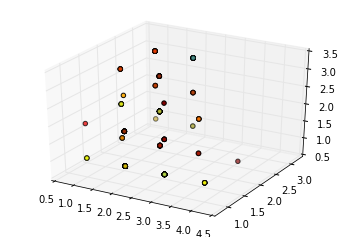

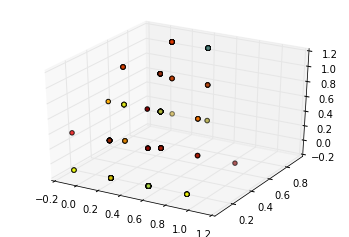

In [49]:
# Observe how changing the scales impacts the distance between specific points

from mpl_toolkits.mplot3d import Axes3D

# Top figure: before normalization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.axis('equal')
ax.scatter(X.t5b2b,X.t5b4y,X.t5b4z, c=normalized_grit)
plt.show()

fig = plt.figure()
# Bottom figure: after normalization
ax1 = fig.add_subplot(111, projection='3d')
ax1.axis('equal')
ax1.scatter(X_norm.t5b2b,X_norm.t5b4y,X_norm.t5b4z, c=normalized_grit)
plt.show()


In [41]:
# AGATA: maybe choose a better variable so we could see clusters clearly?
# In our case, because points are disreeet, often the nearest neighbors just means other points with the exact same
# values. This may be ok but is not an interesting example.

In [42]:
# Now, let's split our data into train and test sets
from sklearn.cross_validation import train_test_split
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, GRIT, test_size = 0.3, random_state = 100)

### How to choose k?
The k-neighbors classification in KNeighborsClassifier is the more commonly used of the two techniques. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=15)
nbrs.fit(X_norm_train, y_norm_train)
#distances, indices = nbrs.kneighbors(X_norm_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [44]:
pred = nbrs.predict(X_test)
accuracy = sum(pred==y_test.values)/pred.shape[0]
accuracy

0.11312217194570136

Exercise: Try changing the n_neighbors variable, see what happens.

In [45]:
results = np.zeros(28)
for i in range(2,30):
    nbrs = KNeighborsClassifier(n_neighbors=i)
    nbrs.fit(X_norm_train, y_norm_train)
    pred = nbrs.predict(X_test)
    accuracy = sum(pred==y_test.values)/pred.shape[0]
    results[i-2] = accuracy

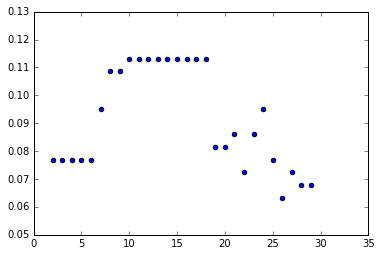

In [46]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(list(range(2,30)),results)
plt.show()